In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train data.csv')
data

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [4]:
# we have missing values for total_bedrooms

In [5]:
data["total_bedrooms"].value_counts(dropna=False)

NaN       176
280.0      46
291.0      41
315.0      41
287.0      40
         ... 
1995.0      1
2190.0      1
1555.0      1
1172.0      1
1183.0      1
Name: total_bedrooms, Length: 1829, dtype: int64

In [6]:
# we have exactly 176 missing values for "total_bedroom" column

In [15]:
# 176 missing values is 1% of dataset so we can drop them

In [16]:
data = data.dropna()
data

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [17]:
data.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000
mean,10292.025343,-119.564780,35.627727,28.622551,2644.361349,539.319540,1434.176787,500.926604,3.863597,206442.492287
std,5939.817307,2.005294,2.139979,12.607315,2217.697233,425.207704,1158.712057,385.466770,1.892362,115264.335238
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5180.750000,-121.790000,33.930000,18.000000,1447.000000,296.000000,788.000000,280.000000,2.562500,119375.000000
50%,10265.500000,-118.490000,34.250000,29.000000,2115.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15431.250000,-118.010000,37.720000,37.000000,3149.250000,647.000000,1733.000000,606.000000,4.733050,264325.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [18]:
# vérification des duplicate
data.duplicated().sum()

0

In [19]:
ocean = data['ocean_proximity'].value_counts()
ocean

<1H OCEAN     7220
INLAND        5190
NEAR OCEAN    2117
NEAR BAY      1805
ISLAND           4
Name: ocean_proximity, dtype: int64

In [20]:
# Convert distance from ocean by numeric values as:
# less 1h from ocean = 1 // INLAND = 2 // NEAR OCEAN = 3 // NEAR BAY = 4 // ISLAND = 5

In [21]:
data["blue_near"] = data.ocean_proximity.apply(lambda x: 1 if x == "<1H OCEAN"
                          else 2 if x == "INLAND" else
                          3 if x == "NEAR OCEAN" else
                          4 if x == "NEAR BAY" else
                          5 if x == "ISLAND" else
                          "NaN")

C:\Users\33610\AppData\Local\Temp\ipykernel_12492\386120572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["blue_near"] = data.ocean_proximity.apply(lambda x: 1 if x == "<1H OCEAN"


In [22]:
data

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,blue_near
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,2
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,1
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,2
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,1
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,2
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,2
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,4
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND,2
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,1


In [26]:
data = data.drop(["Unnamed: 0","ocean_proximity"], axis = 1)


KeyError: "['Unnamed: 0', 'ocean_proximity'] not found in axis"

In [27]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,blue_near
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,2
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,2
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,2
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,2
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,4
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,2
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1


In [29]:
# check the outliers

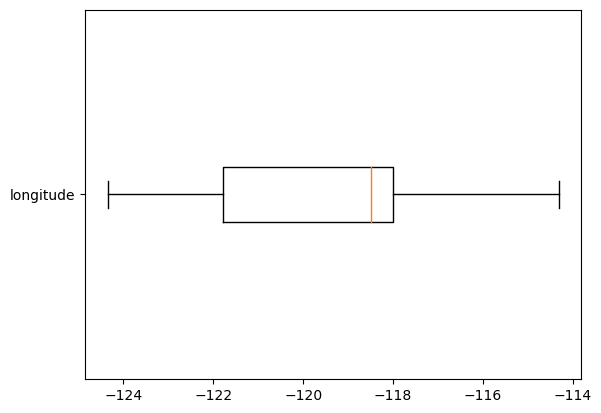

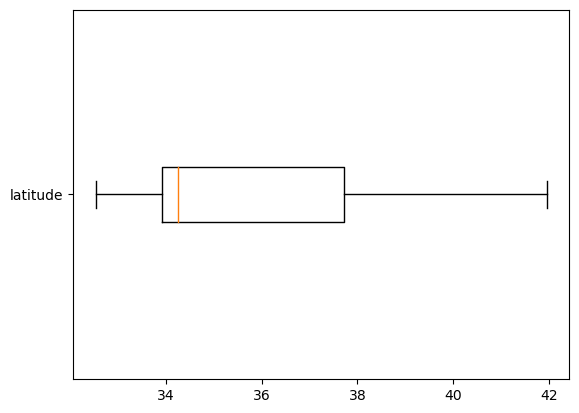

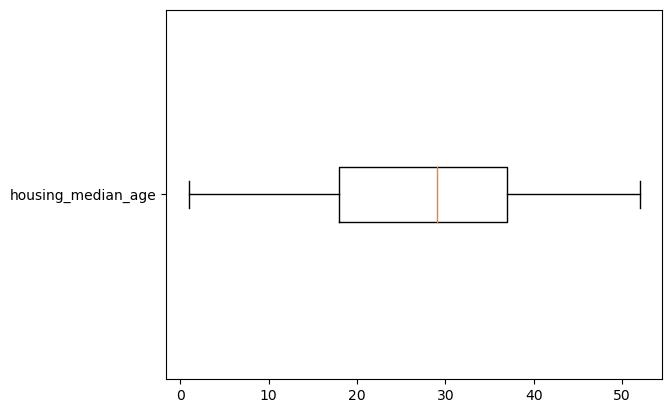

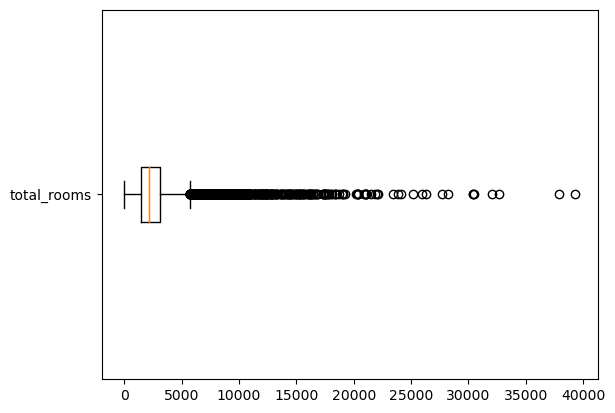

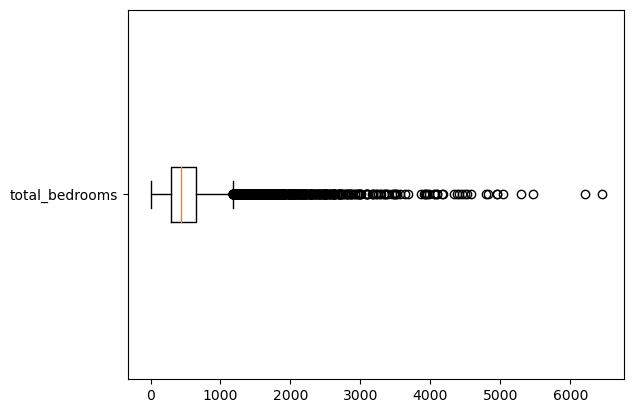

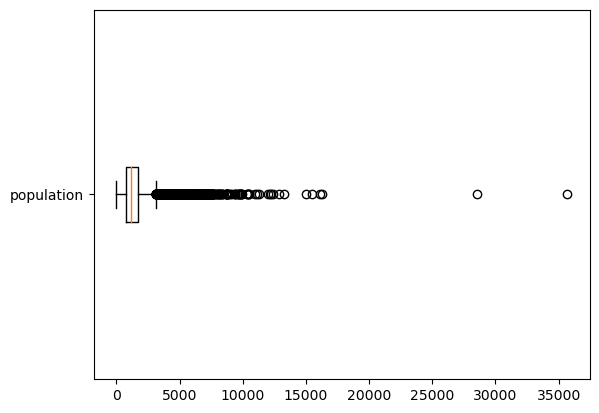

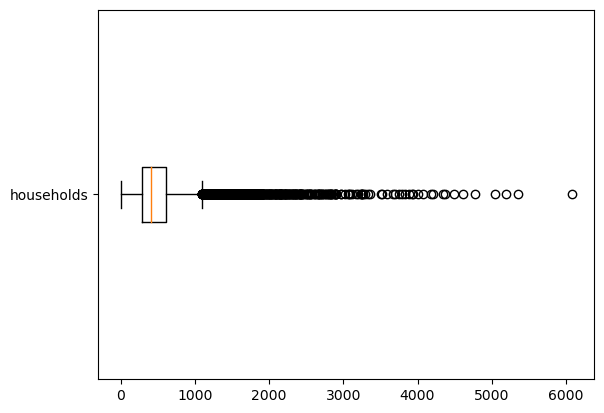

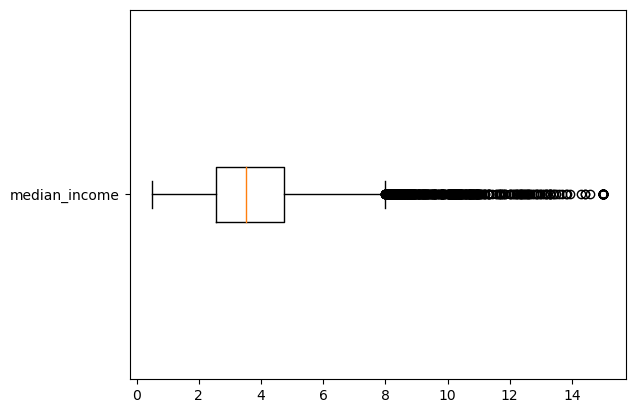

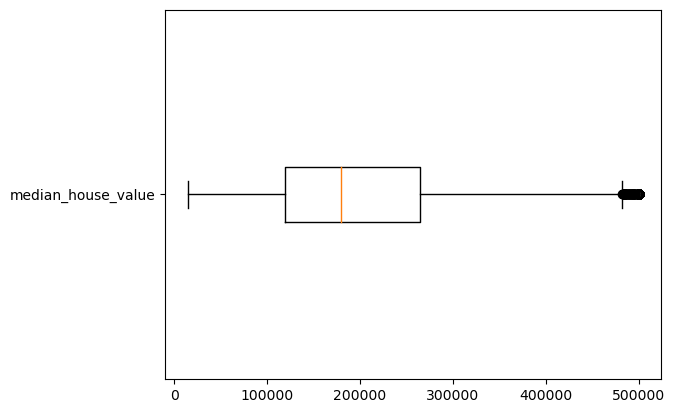

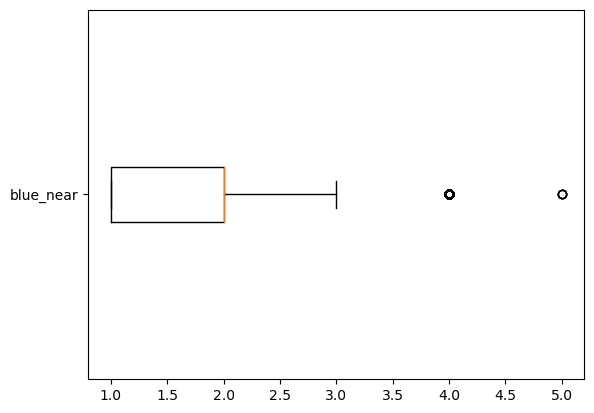

In [30]:
for i in data:
    fig, ax = plt.subplots()
    ax.boxplot(data[i], vert=0,)
    plt.yticks([1],[i])
    plt.show()

In [ ]:
# look for correlation for our dataset with outliers

In [31]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,blue_near
longitude,1.000000,-0.924739,-0.111057,0.045230,0.069623,0.099981,0.056494,-0.020201,-0.046419,-0.437782
latitude,-0.924739,1.000000,0.011399,-0.035165,-0.065210,-0.106251,-0.069326,-0.076014,-0.144143,0.388906
housing_median_age,-0.111057,0.011399,1.000000,-0.361364,-0.324779,-0.295263,-0.307249,-0.112794,0.109763,0.145647
total_rooms,0.045230,-0.035165,-0.361364,1.000000,0.932408,0.855906,0.920824,0.198769,0.132570,-0.020408
total_bedrooms,0.069623,-0.065210,-0.324779,0.932408,1.000000,0.878581,0.979994,-0.005643,0.047478,-0.026148
population,0.099981,-0.106251,-0.295263,0.855906,0.878581,1.000000,0.907529,0.004715,-0.028033,-0.086936
households,0.056494,-0.069326,-0.307249,0.920824,0.979994,0.907529,1.000000,0.015385,0.062674,-0.031728
median_income,-0.020201,-0.076014,-0.112794,0.198769,-0.005643,0.004715,0.015385,1.000000,0.689593,-0.037769
median_house_value,-0.046419,-0.144143,0.109763,0.132570,0.047478,-0.028033,0.062674,0.689593,1.000000,0.020005
blue_near,-0.437782,0.388906,0.145647,-0.020408,-0.026148,-0.086936,-0.031728,-0.037769,0.020005,1.000000


In [ ]:
# our dataset is not normalised, let's try to nprmalize it

In [46]:
def norm(dataset):
    mn = mean(i)
    ec = std(i)
    for i in dataset:
        norm = (i-mn)/ec
        return norm

In [47]:
norm(data)

NameError: name 'mean' is not defined